In [67]:
"""
Collect Data: Capture and label images of our handwriting.
    [ ] Chelsey
    [ ] Shawn
    [ ] Starter data set (MNIST)

Preprocess Data: Resize, normalize, and encode the images and labels.

Build a CNN Model: Use Keras to define a CNN suitable for image classification.
Train the Model: Fit the model on your handwriting dataset.
Evaluate and Predict: Assess model accuracy and use it to predict new handwriting samples.
"""

import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import pickle
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [68]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# LabelBinarizer during training
lb = LabelBinarizer()
lb.fit(y_train)  # Fit the LabelBinarizer with the labels

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

with open("label_binarizer.pkl", "wb") as f:
    pickle.dump(lb, f)


In [69]:
# Build a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 2D image into a 1D vector
    layers.Dense(128, activation='relu'),  # First dense layer with 128 neurons and ReLU activation
    layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax') # Output layer with 10 classes and softmax activation
])


c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [71]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8371 - loss: 0.5459 - val_accuracy: 0.9575 - val_loss: 0.1551
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9523 - loss: 0.1659 - val_accuracy: 0.9632 - val_loss: 0.1279
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9639 - loss: 0.1177 - val_accuracy: 0.9721 - val_loss: 0.0968
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9709 - loss: 0.0943 - val_accuracy: 0.9734 - val_loss: 0.0885
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9757 - loss: 0.0780 - val_accuracy: 0.9741 - val_loss: 0.0838


In [72]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.2f}')


313/313 - 1s - 2ms/step - accuracy: 0.9781 - loss: 0.0750
Test accuracy: 0.98


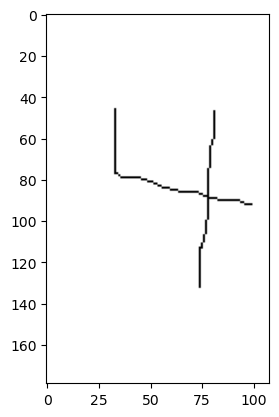

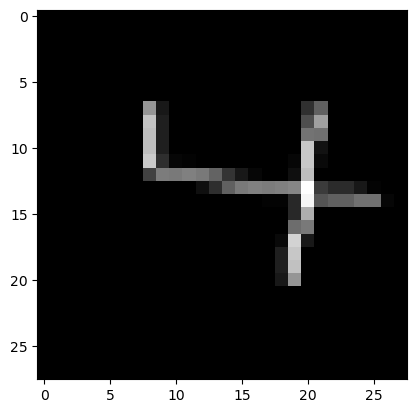

In [73]:
# Load your image
img = Image.open("Resources/Test Images/number4.png")
# Display the original image
plt.imshow(img)
plt.show()

# Convert the image to grayscale 
img_gray = img.convert('L') # 'L' mode is for grayscale

# Invert the image colors if the background is white and digits are black 
img_inverted = ImageOps.invert(img_gray) 

# Resize the image to 28x28 pixels 
img_resized = img_inverted.resize((28, 28)) 

# Display the processed image 
plt.imshow(img_resized, cmap='gray') 
plt.show()

In [83]:
with open("label_binarizer.pkl", "rb") as f:
    lb = pickle.load(f)

# Define preprocess_image function here
def preprocess_image(image_path, img_size=(28, 28)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, img_size)
    image = 255 - image
    image = image / 255.0  # Normalize the image
    
    # Debugging step: print a portion of the preprocessed image
    # print(f"Preprocessed image (partial): {image.flatten()[:10]}")  # Print the first 10 pixel values
    
    return image

# Define predict_handwriting function here
def predict_handwriting(image_path, model, lb, img_size=(28, 28)):
    # Preprocess the image
    image = preprocess_image(image_path, img_size)
    # print(f"Image shape before prediction: {image.shape}")  # Debugging step
    image = image.reshape(1, img_size[0], img_size[1], 1)
    
    # Predict the class
    prediction = model.predict(image)
    # print(f"Prediction output: {prediction}")  # Debugging step
    predicted_label = lb.inverse_transform(prediction)[0]
    
    return predicted_label

# Example usage with your model
image_path = "Resources/Test Images/test5b.png"
predicted_label = predict_handwriting(image_path, model, lb)
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label: 5
